# 对比不同分类算法在LOL比赛获胜方预测中的效果

## 1.问题描述

### 本小组利用收集的LOL比赛前10min战场数据（如蓝方总金币、蓝方击杀总数、蓝方每分钟经验等），用不同的分类预测模型来对本局游戏的结果进行预测，并对这些模型进行比较分析。

## 2.数据准备

### 2.1 原始数据导入及数据解释

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

alldata = pd.read_excel("alldata.xlsx")
bluedata = pd.read_excel("bluedata.xlsx")
reddata = pd.read_excel("reddata.xlsx")

In [2]:
alldata.head()

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  ...  \
0          9           6           11                  0            0  ...   
1          5           5            5                  0            0  ...   
2          7          11            4                  1            1  ...   
3          4           5            5                  1            0  ...   
4          6           6            6                  0            0  ...   

   redTowersDestroyed  redTotalGold  redAvgLevel  redTotalExperience  \
0                   0         16567          6.8               17047   
1                   1         17620          6.8               17438   
2                   0         17285          6.8               17254   
3                   0         16478          7.0               17961   
4                   0         17404          7.0               18313   

   redTotalMinionsKilled  redTotalJungleMinionsKilled  redGoldDiff  \
0                    197                           55         -643   
1                    240                           52         2908   
2                    203                           28         1172   
3                    235                           47         1321   
4                    225                           67         1004   

   redExperienceDiff  redCSPerMin  redGoldPerMin  
0                  8         19.7         1656.7  
1               1173         24.0         1762.0  
2               1033         20.3         1728.5  
3                  7         23.5         1647.8  
4               -230         22.5         1740.4  

[5 rows x 40 columns]

In [3]:
reddata.head()

redWardsPlaced  redWardsDestroyed  redFirstBlood  redKills  redDeaths  \
0              15                  6              0         6          9   
1              12                  1              1         5          5   
2              15                  3              1        11          7   
3              15                  2              1         5          4   
4              17                  2              1         6          6   

   redAssists  redEliteMonsters  redDragons  redHeralds  redTowersDestroyed  \
0           8                 0           0           0                   0   
1           2                 2           1           1                   1   
2          14                 0           0           0                   0   
3          10                 0           0           0                   0   
4           7                 1           1           0                   0   

   redTotalGold  redAvgLevel  redTotalExperience  redTotalMinionsKilled  \
0         16567          6.8               17047                    197   
1         17620          6.8               17438                    240   
2         17285          6.8               17254                    203   
3         16478          7.0               17961                    235   
4         17404          7.0               18313                    225   

   redTotalJungleMinionsKilled  redGoldDiff  redExperienceDiff  redCSPerMin  \
0                           55         -643                  8         19.7   
1                           52         2908               1173         24.0   
2                           28         1172               1033         20.3   
3                           47         1321                  7         23.5   
4                           67         1004               -230         22.5   

   redGoldPerMin  redWins  
0         1656.7        1  
1         1762.0        1  
2         1728.5        1  
3         1647.8        1  
4         1740.4        1

In [4]:
bluedata.head()

blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  blueDeaths  \
0               28                   2               1          9           6   
1               12                   1               0          5           5   
2               15                   0               0          7          11   
3               43                   1               0          4           5   
4               75                   4               0          6           6   

   blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
0           11                  0            0            0   
1            5                  0            0            0   
2            4                  1            1            0   
3            5                  1            0            1   
4            6                  0            0            0   

   blueTowersDestroyed  blueTotalGold  blueAvgLevel  blueTotalExperience  \
0                    0          17210           6.6                17039   
1                    0          14712           6.6                16265   
2                    0          16113           6.4                16221   
3                    0          15157           7.0                17954   
4                    0          16400           7.0                18543   

   blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  \
0                     195                            36           643   
1                     174                            43         -2908   
2                     186                            46         -1172   
3                     201                            55         -1321   
4                     210                            57         -1004   

   blueExperienceDiff  blueCSPerMin  blueGoldPerMin  blueWins  
0                  -8          19.5          1721.0         0  
1               -1173          17.4          1471.2         0  
2               -1033          18.6          1611.3         0  
3                  -7          20.1          1515.7         0  
4                 230          21.0          1640.0         0

In [5]:
#统计最终获胜结果，观察样本是否均衡；
pd.value_counts(alldata.blueWins)

0    4949
1    4930
Name: blueWins, dtype: int64

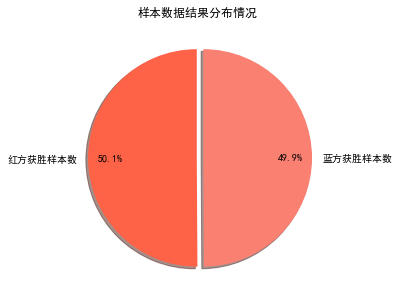

In [6]:
#饼图可视化；
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文显示
plt.figure(figsize=(5, 5))  # 将画布设定为正方形，则绘制的饼图是正圆
label = ['红方获胜样本数', '蓝方获胜样本数']  # 定义饼图的标签，标签是列表
explode = [0.01, 0.05]  # 设定各项距离圆心n个半径

ppp = pd.value_counts(alldata.blueWins)
colors = ['tomato','salmon'] 
plt.pie(ppp,explode=explode, colors=colors,labels=label,autopct='%1.1f%%',pctdistance=0.8,shadow=True,startangle=90)  # 绘制饼图
plt.title('样本数据结果分布情况')

plt.show()

以上结果显示，我们一共有4949条红方获胜的数据，占整体样本的50.1%；
同时有4930条蓝方获胜的数据，占总体样本的49.9%；数据样本比较均衡；

In [7]:
#描述性统计分析，导出简单的统计值；
data_describe = alldata.describe(include='all')
data_describe

gameId     blueWins  blueWardsPlaced  blueWardsDestroyed  \
count  9.879000e+03  9879.000000      9879.000000         9879.000000   
mean   4.500084e+09     0.499038        22.288288            2.824881   
std    2.757328e+07     0.500024        18.019177            2.174998   
min    4.295358e+09     0.000000         5.000000            0.000000   
25%    4.483301e+09     0.000000        14.000000            1.000000   
50%    4.510920e+09     0.000000        16.000000            3.000000   
75%    4.521733e+09     1.000000        20.000000            4.000000   
max    4.527991e+09     1.000000       250.000000           27.000000   

       blueFirstBlood    blueKills   blueDeaths  blueAssists  \
count     9879.000000  9879.000000  9879.000000  9879.000000   
mean         0.504808     6.183925     6.137666     6.645106   
std          0.500002     3.011028     2.933818     4.064520   
min          0.000000     0.000000     0.000000     0.000000   
25%          0.000000     4.000000     4.000000     4.000000   
50%          1.000000     6.000000     6.000000     6.000000   
75%          1.000000     8.000000     8.000000     9.000000   
max          1.000000    22.000000    22.000000    29.000000   

       blueEliteMonsters  blueDragons  ...  redTowersDestroyed  redTotalGold  \
count        9879.000000  9879.000000  ...         9879.000000   9879.000000   
mean            0.549954     0.361980  ...            0.043021  16489.041401   
std             0.625527     0.480597  ...            0.216900   1490.888406   
min             0.000000     0.000000  ...            0.000000  11212.000000   
25%             0.000000     0.000000  ...            0.000000  15427.500000   
50%             0.000000     0.000000  ...            0.000000  16378.000000   
75%             1.000000     1.000000  ...            0.000000  17418.500000   
max             2.000000     1.000000  ...            2.000000  22732.000000   

       redAvgLevel  redTotalExperience  redTotalMinionsKilled  \
count  9879.000000         9879.000000            9879.000000   
mean      6.925316        17961.730438             217.349226   
std       0.305311         1198.583912              21.911668   
min       4.800000        10465.000000             107.000000   
25%       6.800000        17209.500000             203.000000   
50%       7.000000        17974.000000             218.000000   
75%       7.200000        18764.500000             233.000000   
max       8.200000        22269.000000             289.000000   

       redTotalJungleMinionsKilled   redGoldDiff  redExperienceDiff  \
count                  9879.000000   9879.000000        9879.000000   
mean                     51.313088    -14.414111          33.620306   
std                      10.027885   2453.349179        1920.370438   
min                       4.000000 -11467.000000       -8348.000000   
25%                      44.000000  -1596.000000       -1212.000000   
50%                      51.000000    -14.000000          28.000000   
75%                      57.000000   1585.500000        1290.500000   
max                      92.000000  10830.000000        9333.000000   

       redCSPerMin  redGoldPerMin  
count  9879.000000    9879.000000  
mean     21.734923    1648.904140  
std       2.191167     149.088841  
min      10.700000    1121.200000  
25%      20.300000    1542.750000  
50%      21.800000    1637.800000  
75%      23.300000    1741.850000  
max      28.900000    2273.200000  

[8 rows x 40 columns]

In [8]:
#检查数据各个属性是否具有缺失值
print (alldata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

检查数据各个属性是否具有缺失值，我们可以看到，所有样本数据都是9879条数据，无缺失数据；

### 2.2数据可视化探索

#### 2.2.1 蓝方数据

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


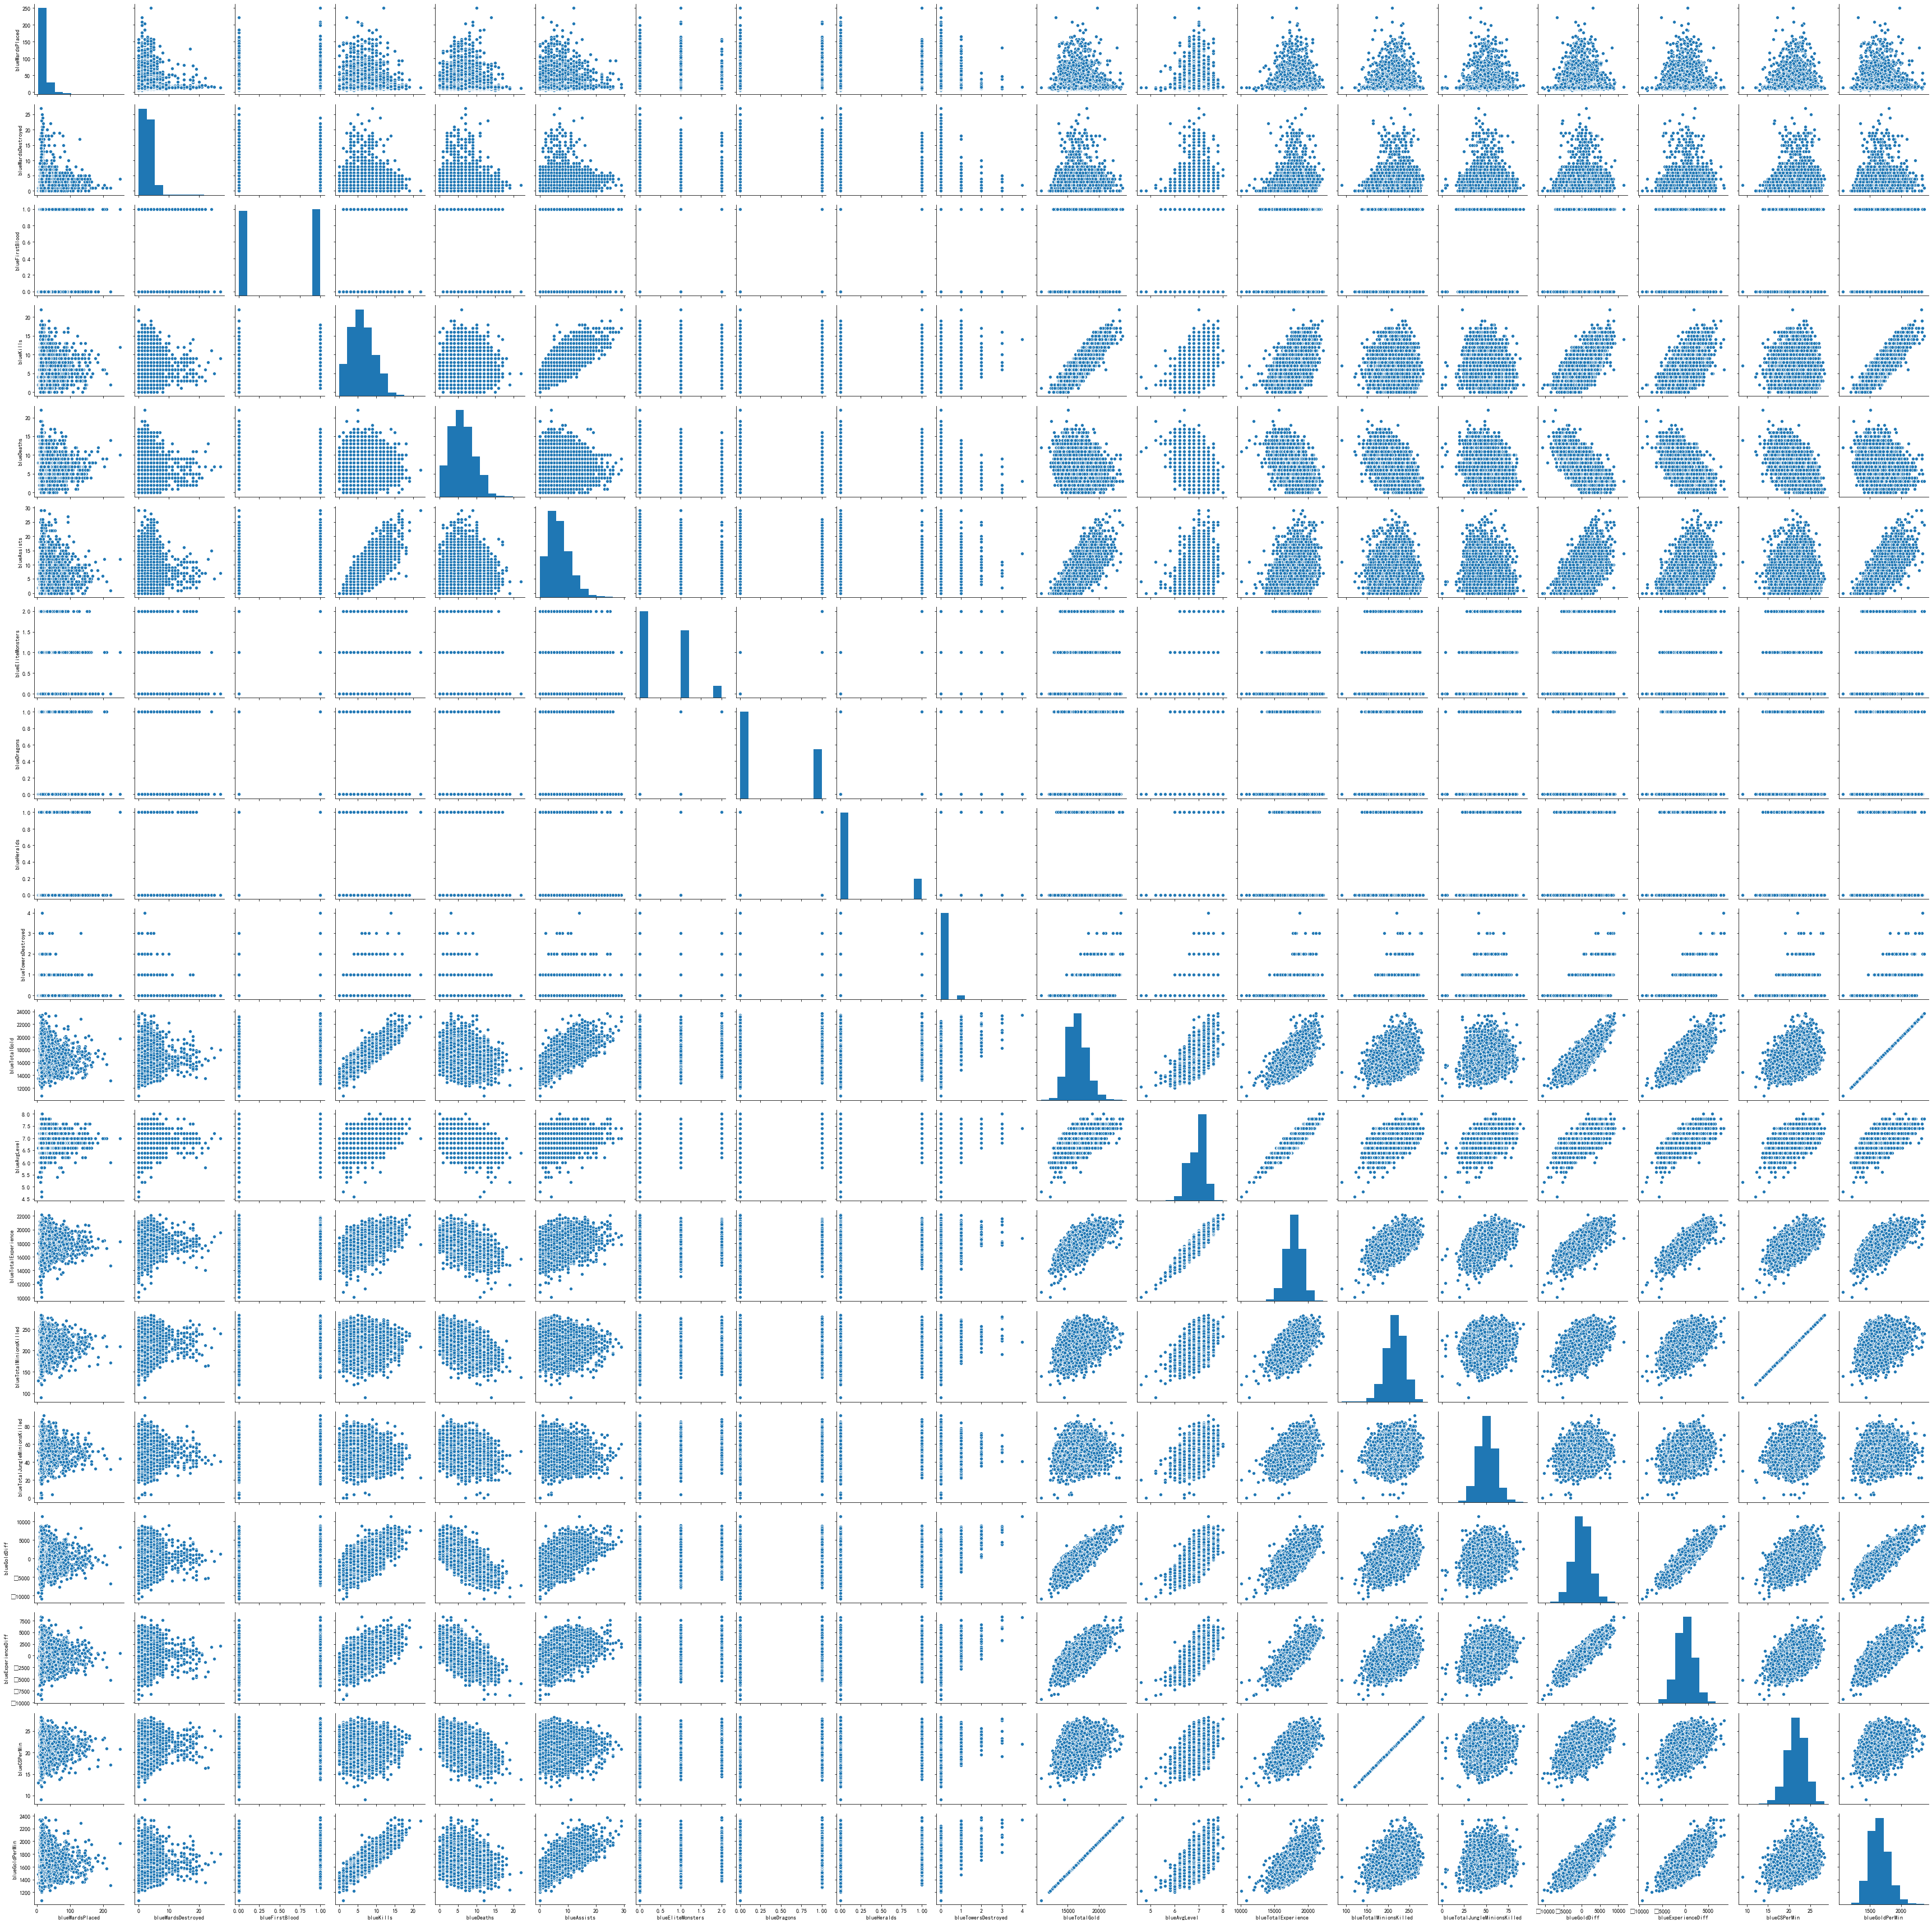

In [9]:
values = bluedata.iloc[:,:19]
correlation = values.corr()
sns.pairplot(values)#散点关系图

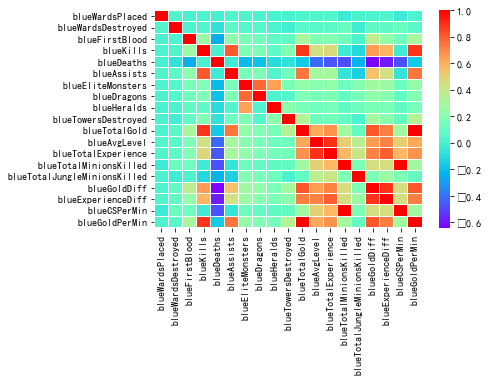

In [10]:
sns.heatmap(correlation, linewidths = 0.05, cmap='rainbow')#热力图

#### 2.2.2红方数据

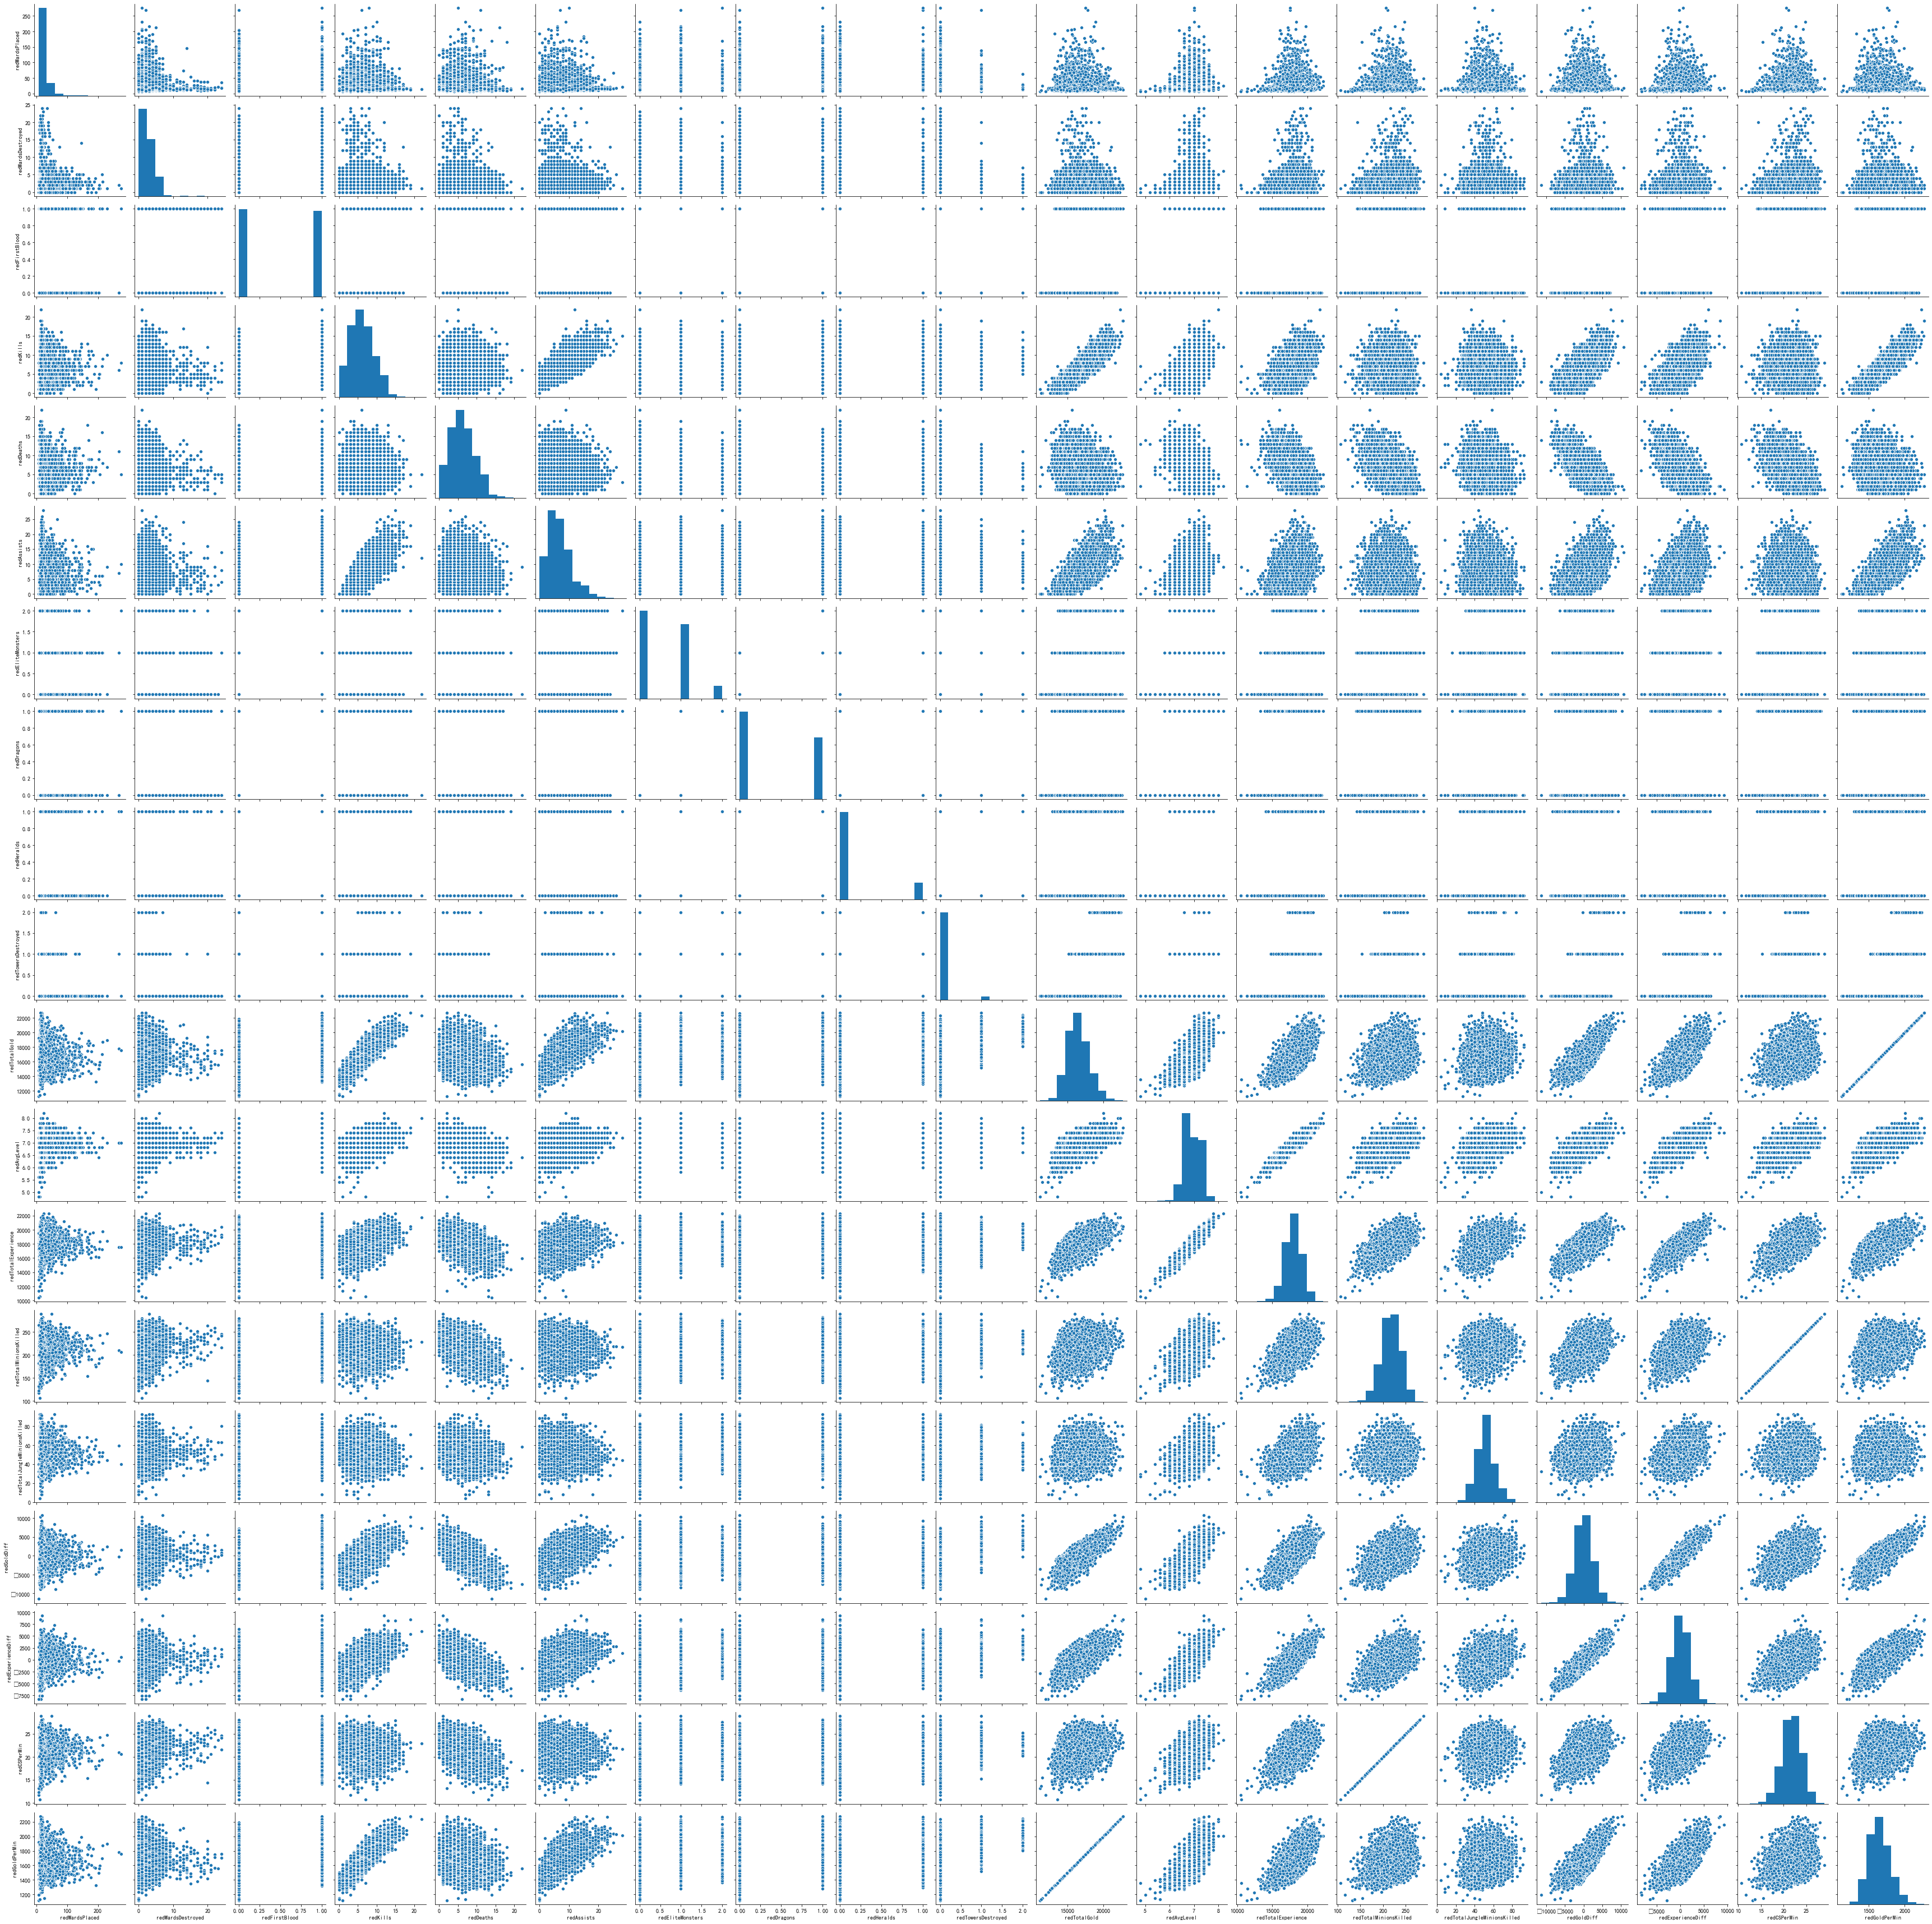

In [11]:
values_2 = reddata.iloc[:,:19]
correlation_2 = values_2.corr()
sns.pairplot(values_2)#散点关系图

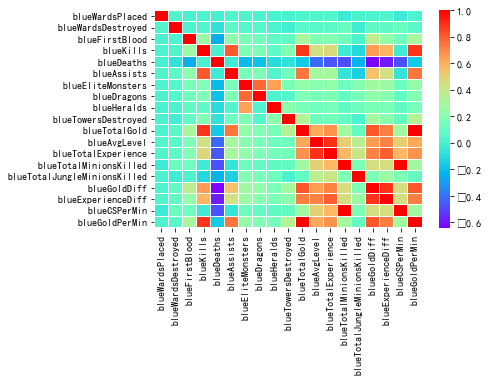

In [12]:
sns.heatmap(correlation, linewidths = 0.05, cmap='rainbow')#热力图

### 2.3 数据预处理

#### 2.3.1 对蓝方和红方差值或者比值有意义的属性进行数据处理

In [13]:
writer=pd.ExcelWriter('transform.xlsx')

df1=alldata['sub_wardsplaced']=alldata['blueWardsPlaced']-alldata['redWardsPlaced']
tr1_df=pd.DataFrame(df1,columns=['sub_wardsplaced'])

df2=alldata['sub_TG']=alldata['blueTotalGold']-alldata['redTotalGold']
tr2_df=pd.DataFrame(df2,columns=['sub_TG'])

df3=alldata['sub_AvgL']=alldata['blueAvgLevel']-alldata['redAvgLevel']
tr3_df=pd.DataFrame(df3,columns=['sub_AvgL'])

df4=alldata['sub_TMKiled']=alldata['blueTotalMinionsKilled']-alldata['redTotalMinionsKilled']
tr4_df=pd.DataFrame(df4,columns=['df5=alldata.iloc[:,5].div(alldata.iloc[:,6],axis=0)sub_TMKiled'])

tr1_df.to_excel(writer)
tr2_df.to_excel(writer,startcol=2)
tr3_df.to_excel(writer,startcol=4)
tr4_df.to_excel(writer,startcol=6)

df5=alldata.iloc[:,5].div(alldata.iloc[:,6],axis=0)
tr5_df=pd.DataFrame(df5,columns=['blue kills/die'])

df6=alldata.iloc[:,24].div(alldata.iloc[:,25],axis=0)
tr6_df=pd.DataFrame(df6,columns=['red kills/die'])

df7=alldata.iloc[:,7].div(alldata.iloc[:,26],axis=0)
tr7_df=pd.DataFrame(df7,columns=['blueA/redA'])

tr5_df.to_excel(writer,startcol=8)
tr6_df.to_excel(writer,startcol=10)
tr7_df.to_excel(writer,startcol=12)

writer.save()
writer.close()

#### 2.3.2  对剩余数据进行主成分分析

In [14]:
relation_data = pd.read_excel("relation_data.xlsx")

values_3 = relation_data.iloc[:,:11]
correlation_3 = values_3.corr()

values_4 = relation_data.iloc[:,12:23]
correlation_4 = values_4.corr()

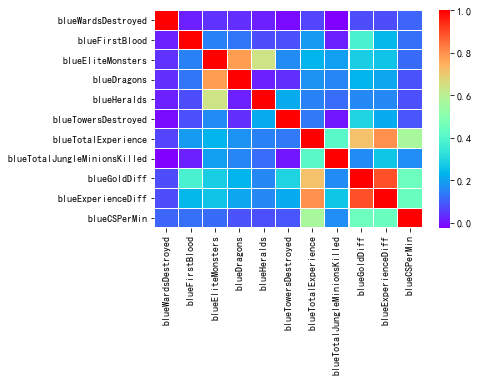

In [15]:
sns.heatmap(correlation_3, linewidths = 0.05, cmap='rainbow')#热力图

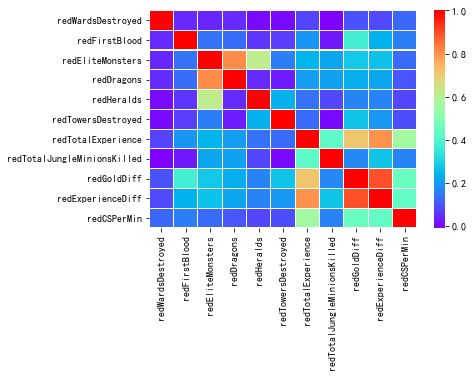

In [16]:
sns.heatmap(correlation_4, linewidths = 0.05, cmap='rainbow')#热力图

explained variance ratio:[9.08687722e-01 6.19661524e-02 2.93383684e-02 6.96793061e-06]


(0.7, 1.02)

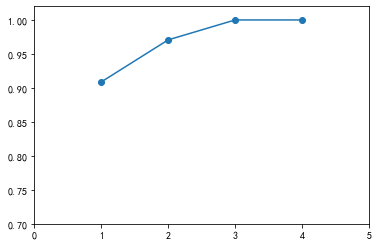

In [17]:
pca_3 = PCA(n_components=4)#选取四个主成分
pc = pca_3.fit_transform(values_3)
print("explained variance ratio:%s"% pca_3.explained_variance_ratio_)#输出各个主成分所占的比例；
plt.plot(range(1,5),np.cumsum(pca_3.explained_variance_ratio_))#绘制主成分累计比例图
plt.scatter(range(1,5),np.cumsum(pca_3.explained_variance_ratio_))
plt.xlim(0,5)
plt.ylim(0.7,1.02)

In [18]:
pca5 =PCA(n_components=1)#选取一个主成分
pc5=pca5.fit_transform(values_3)
pc5_df=pd.DataFrame(pc5,columns=['pc_5'])

explained variance ratio:[9.08687722e-01 6.19661524e-02 2.93383684e-02 6.96793061e-06]


(0.7, 1.02)

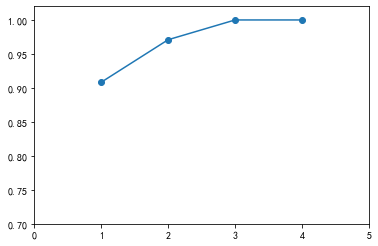

In [19]:
pca_4 = PCA(n_components=4)#选取四个主成分
pc = pca_4.fit_transform(values_4)
print("explained variance ratio:%s"% pca_3.explained_variance_ratio_)#输出各个主成分所占的比例
plt.plot(range(1,5),np.cumsum(pca_4.explained_variance_ratio_))#绘制主成分累计比例图
plt.scatter(range(1,5),np.cumsum(pca_4.explained_variance_ratio_))
plt.xlim(0,5)
plt.ylim(0.7,1.02)

In [20]:
pca6 =PCA(n_components=1)#选取一个主成分
pc6=pca6.fit_transform(values_4)
pc6_df=pd.DataFrame(pc6,columns=['pc_5'])

In [21]:
pc5_df.to_excel('relation_data(pca).xls')
pc6_df.to_excel('relation_data_2(pca).xls')

将得到的数据在excel中进行简单的整理，储存在transform.csv中；

## 3.模型分类预测

### 3.1 Logistic回归分类

In [22]:
import statsmodels.api as smf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
purchase = pd.read_csv('transform.csv')
purchase['Intercept'] = 1
model_data=purchase
model_data.head()
purchase.isnull().sum()

blueWins               0
sub_wardsplaced        0
sub_TG                 0
sub_AvgL               0
sub_TMKiled            0
blue kills/die         0
red kills/die          0
blueA/redA             0
blueEliteMonsters      0
blueDragons            0
blueHeralds            0
blueTowersDestroyed    0
blueTotalGold          0
blueAvgLevel           0
blueFirstBlood         0
Intercept              0
dtype: int64

In [24]:
model_data.columns[1:]

Index(['sub_wardsplaced', 'sub_TG', 'sub_AvgL', 'sub_TMKiled',
       'blue kills/die', 'red kills/die', 'blueA/redA', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueFirstBlood', 'Intercept'],
      dtype='object')

In [25]:
X = model_data[model_data.columns[1:]]
y = model_data['blueWins']
# 训练集与测试集的比例为75%和25%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=0)

# 根据训练集构建Logistic分类器
logistic = smf.Logit(y_train,X_train).fit()
logistic.summary()

Optimization terminated successfully.
         Current function value: 0.527668
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               blueWins   No. Observations:                 7409
Model:                          Logit   Df Residuals:                     7395
Method:                           MLE   Df Model:                           13
Date:                Tue, 15 Dec 2020   Pseudo R-squ.:                  0.2387
Time:                        15:08:00   Log-Likelihood:                -3909.5
converged:                       True   LL-Null:                       -5135.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
sub_wardsplaced         0.0001      0.001      0.096      0.924      -0.002       0.002
sub_TG                  0.0005   3.76e-05     13.373      0.000       0.000       0.001
sub_AvgL                0.5160      0.135      3.836      0.000       0.252       0.780
sub_TMKiled            -0.0017      0.001     -1.373      0.170      -0.004       0.001
blue kills/die          0.0444      0.040      1.100      0.272      -0.035       0.124
red kills/die          -0.0204      0.037     -0.548      0.584      -0.093       0.053
blueA/redA             -0.0191      0.020     -0.945      0.345      -0.059       0.020
blueEliteMonsters       0.1942   3.41e+06   5.69e-08      1.000   -6.69e+06    6.69e+06
blueDragons             0.3168   3.41e+06   9.28e-08      1.000   -6.69e+06    6.69e+06
blueHeralds            -0.1226   3.41e+06  -3.59e-08      1.000   -6.69e+06    6.69e+06
blueTowersDestroyed    -0.2219      0.150     -1.478      0.139      -0.516       0.072
blueTotalGold        9.107e-07    3.4e-05      0.027      0.979   -6.58e-05    6.76e-05
blueAvgLevel           -0.0377      0.155     -0.243      0.808      -0.342       0.267
blueFirstBlood          0.0287      0.059      0.484      0.629      -0.088       0.145
Intercept               0.0374      1.084      0.034      0.972      -2.087       2.162
=======================================================================================
"""

In [26]:
# 根据分类器，在测试集上预测概率
prob = logistic.predict(exog = X_test)
# 根据概率值，将观测进行分类，不妨以0.5作为阈值
y_pred = np.where(prob >= 0.5, 1, 0)

# 根据预测值和实际值构建混淆矩阵
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
cm

array([[898, 352],
       [344, 876]], dtype=int64)

In [27]:
np.exp(logistic.params)

sub_wardsplaced        1.000101
sub_TG                 1.000503
sub_AvgL               1.675270
sub_TMKiled            0.998278
blue kills/die         1.045431
red kills/die          0.979796
blueA/redA             0.981095
blueEliteMonsters      1.214343
blueDragons            1.372686
blueHeralds            0.884628
blueTowersDestroyed    0.801026
blueTotalGold          1.000001
blueAvgLevel           0.962983
blueFirstBlood         1.029138
Intercept              1.038089
dtype: float64

In [28]:
cr = classification_report(y_test, y_pred)

In [64]:
# 计算模型的准确率
accuracy1 = cm.diagonal().sum()/cm.sum()
accuracy1

0.7251012145748987

### 3.2 决策树分类

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 

In [5]:
df = pd.read_csv('transform.csv')
df.head() 

blueWins  sub_wardsplaced  sub_TG  sub_AvgL  sub_TMKiled  blue kills/die  \
0         0               13     643      -0.2           -2            1.50   
1         0                0   -2908      -0.2          -66            1.00   
2         0                0   -1172      -0.4          -17            0.64   
3         0               28   -1321       0.0          -34            0.80   
4         0               58   -1004       0.0          -15            1.00   

   red kills/die  blueA/redA  blueEliteMonsters  blueDragons  blueHeralds  \
0           0.67        1.38                  0            0            0   
1           1.00        2.50                  0            0            0   
2           1.57        0.29                  1            1            0   
3           1.25        0.50                  1            0            1   
4           1.00        0.86                  0            0            0   

   blueTowersDestroyed  blueTotalGold  blueAvgLevel  blueFirstBlood  
0                    0          17210           6.6               1  
1                    0          14712           6.6               0  
2                    0          16113           6.4               0  
3                    0          15157           7.0               0  
4                    0          16400           7.0               0

In [6]:
df_model=df
x = df_model.drop('blueWins',axis=1)
y = df_model['blueWins']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(7409, 14) (2470, 14) (7409,) (2470,)


In [7]:
parameters = {
    'splitter': ('best', 'random'),
    'criterion':('gini', 'entropy'),
    'max_depth':[*range(1, 20, 2)],
}

# 建立模型
clf = DecisionTreeClassifier(random_state=0)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(X_train, y_train) 

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'splitter': ('best', 'random')})

In [8]:
# 输出最佳得分 
accuracy2=GS.best_score_
print("best score: ", GS.best_score_)
print("best param: ", GS.best_params_) 

best score:  0.7204754349491191
best param:  {'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}


In [9]:
# 最佳模型
best_clf = DecisionTreeClassifier(criterion="gini", max_depth=7, splitter="best")
best_clf.fit(X_train,y_train) 
print("score:", best_clf.score(X_test,y_test)) 

score: 0.719838056680162


In [10]:
# 输出分类报告
y_pred = best_clf.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print('Classification report : \n', cr)  

Classification report : 
               precision    recall  f1-score   support

           0       0.74      0.67      0.71      1237
           1       0.70      0.77      0.73      1233

    accuracy                           0.72      2470
   macro avg       0.72      0.72      0.72      2470
weighted avg       0.72      0.72      0.72      2470



Text(0.5, 1.0, 'confusion_matrix')

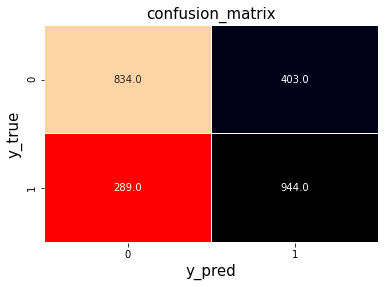

In [11]:
# 热力图
g1 = sns.heatmap(cm, annot=True, fmt=".1f", cmap="flag", linewidths=0.2, cbar=False)
g1.set_ylabel('y_true', fontdict={'fontsize': 15})
g1.set_xlabel('y_pred', fontdict={'fontsize': 15})  
g1.set_title('confusion_matrix', fontdict={'fontsize': 15})  

In [12]:
# 输出属性重要性
imp = pd.DataFrame(list(zip(X_train.columns, best_clf.feature_importances_))) 
imp.columns = ['columns', 'importances']
imp = imp.sort_values('importances', ascending=False)
imp 

columns  importances
1                sub_TG     0.811552
3           sub_TMKiled     0.030509
6            blueA/redA     0.026387
0       sub_wardsplaced     0.026138
8           blueDragons     0.025591
5         red kills/die     0.018416
11        blueTotalGold     0.014760
12         blueAvgLevel     0.013410
4        blue kills/die     0.012578
2              sub_AvgL     0.011452
7     blueEliteMonsters     0.007868
10  blueTowersDestroyed     0.001339
9           blueHeralds     0.000000
13       blueFirstBlood     0.000000

In [13]:
from sklearn import tree 

dot_data = tree.export_graphviz(decision_tree=best_clf, max_depth=3,
                                 out_file=None, 
                                 feature_names=X_train.columns,
                                 class_names=['1', '2'], 
                                 filled=True,
                                 rounded=True
                                )

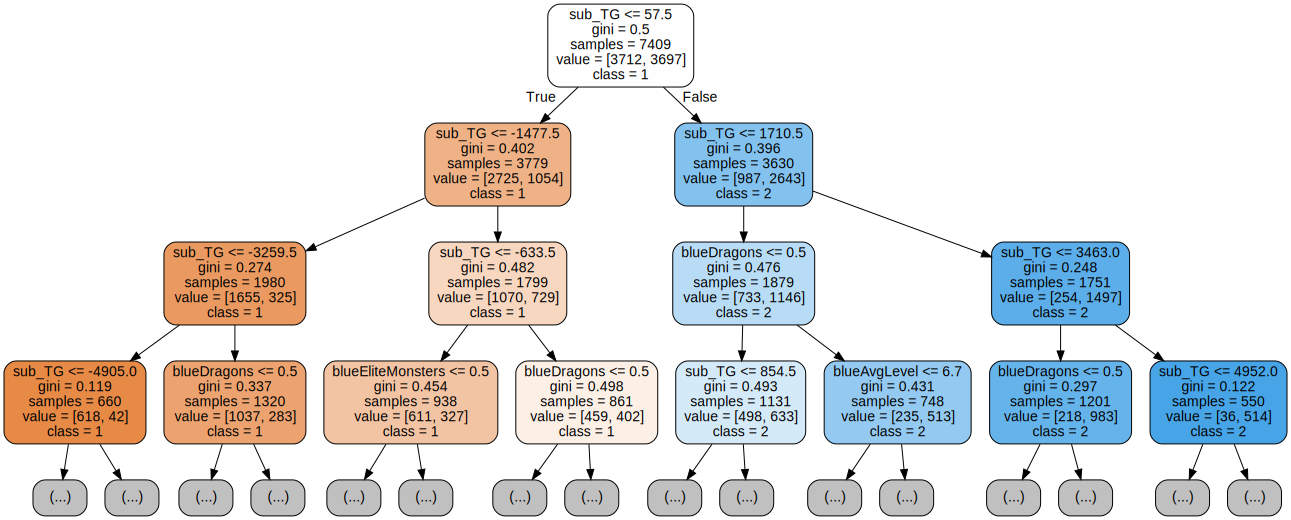

In [14]:
import graphviz
graph=graphviz.Source(dot_data)
graph

### 3.3判别分析

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 

In [53]:
df = pd.read_csv('transform.csv')
df.head() 

blueWins  sub_wardsplaced  sub_TG  sub_AvgL  sub_TMKiled  blue kills/die  \
0         0               13     643      -0.2           -2            1.50   
1         0                0   -2908      -0.2          -66            1.00   
2         0                0   -1172      -0.4          -17            0.64   
3         0               28   -1321       0.0          -34            0.80   
4         0               58   -1004       0.0          -15            1.00   

   red kills/die  blueA/redA  blueEliteMonsters  blueDragons  blueHeralds  \
0           0.67        1.38                  0            0            0   
1           1.00        2.50                  0            0            0   
2           1.57        0.29                  1            1            0   
3           1.25        0.50                  1            0            1   
4           1.00        0.86                  0            0            0   

   blueTowersDestroyed  blueTotalGold  blueAvgLevel  blueFirstBlood  
0                    0          17210           6.6               1  
1                    0          14712           6.6               0  
2                    0          16113           6.4               0  
3                    0          15157           7.0               0  
4                    0          16400           7.0               0

In [54]:
df_model=df
x = df_model.drop('blueWins', axis=1)
y = df_model['blueWins']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(7409, 14) (2470, 14) (7409,) (2470,)


In [55]:
purchase = pd.read_csv('transform.csv')
model_data=purchase
model_data.head()
purchase.isnull().sum()

blueWins               0
sub_wardsplaced        0
sub_TG                 0
sub_AvgL               0
sub_TMKiled            0
blue kills/die         0
red kills/die          0
blueA/redA             0
blueEliteMonsters      0
blueDragons            0
blueHeralds            0
blueTowersDestroyed    0
blueTotalGold          0
blueAvgLevel           0
blueFirstBlood         0
dtype: int64

In [56]:
clf = LDA(n_components=1) #分类器
clf.fit(X_train, y_train) #用数据进行训练
pre_y = clf.predict(X_test) #对测试数据进行预测
pre_y

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [57]:
cm=metrics.confusion_matrix(y_test, pre_y, labels=[0,1])
cm

array([[887, 350],
       [329, 904]], dtype=int64)

In [58]:
cr = classification_report(y_test, pre_y)

Text(0.5, 1.0, 'confusion_matrix')

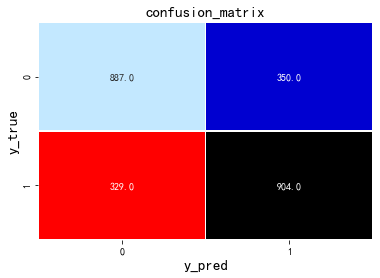

In [59]:
g1 = sns.heatmap(cm, annot=True, fmt=".1f", cmap="flag", linewidths=0.2, cbar=False)
g1.set_ylabel('y_true', fontdict={'fontsize': 15})
g1.set_xlabel('y_pred', fontdict={'fontsize': 15})  
g1.set_title('confusion_matrix', fontdict={'fontsize': 15}) 

In [61]:
#准确率
accuracy3 = cm.diagonal().sum()/cm.sum()
accuracy3

0.7251012145748987

### 3.3模型对比

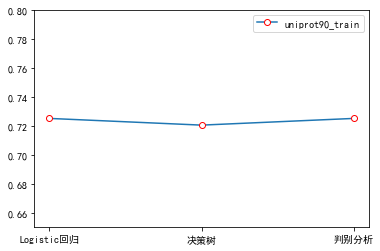

In [73]:
x = ['Logistic回归','决策树','判别分析']
y_train = [accuracy1,accuracy2,accuracy3] 
plt.ylim(0.65, 0.8) 
plt.plot(x, y_train, marker='o', mec='r', mfc='w',label='uniprot90_train')
plt.legend()